In [3]:
import os
import random
from typing import Any, Callable, Dict, List, Optional, Tuple
import numpy as np
import cv2
import matplotlib.pyplot as plt
import ipywidgets

from IPython.core.interactiveshell import InteractiveShell
from IPython import display
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline
%matplotlib widget
plt.rcParams['figure.figsize'] = (12, 5);

In [4]:
import torchvision
import torch

dataset_path = "/home/quantum/datasets/mnist"

dataset = torchvision.datasets.MNIST(root=dataset_path, download=True)
model = torch.load("experiments/resnet34/model_last.pth")

In [47]:
class CustomMNIST(torchvision.datasets.MNIST):
    def __init__(
        self, root: str, train: bool = True,
        transform: Optional[Callable] = None,
        target_transform: Optional[Callable] = None,
        download: bool = False) -> None:
        super().__init__(root, transform=transform, target_transform=target_transform, download=download)

        if self._check_legacy_exist():
            self.data, self.targets = self._load_legacy_data()
            return

        if download:
            self.download()

        if not self._check_exists():
            raise RuntimeError("Dataset not found. You can use download=True to download it")

        self.data, self.targets = self._load_data()
        
    def __getitem__(self, index: int) -> Tuple[Any, Any]:
        
        # num_images = random.randint(4, 31)
        num_images = int(random.normalvariate(10, 3))
        # if num_images > 30:
        #     num_images
        num_images = 3 if num_images < 3 else num_images
        num_images = 30 if num_images > 30 else num_images
        images, targets = [], []
        
        for i in range(num_images):
            index = random.randint(0, len(self))
            images.append(self.data[index])
            targets.append(int(self.targets[index]))
        label = 1 if 4 in targets else 0
            
        return images, label

In [48]:
dataset = CustomMNIST(root=dataset_path, download=True)

In [49]:
def visualize_dataset(dataset):
    def visualize_image(num):
        sample = dataset[num]
        img = torch.zeros(30, 28, 28)
        
        for i in range(len(sample[0])):
            img[i] = sample[0][i]
        model_out = model(img.unsqueeze(0))
        model_out = 0 if model_out[0][0] < 0.5 else 1
        return sample, model_out

    def f_fabric(num):
        def f(x):
            (images, target), pred = visualize_image(x)
            rows = 1 + len(images) // 3

            fig, axes = plt.subplots(rows, 3, figsize = (15, 12))
            # print(f'Label: {target}')
            # print(f'Prediction: {pred}')
            
            for i in range(rows*3):
                if i < len(images):
                    axes.ravel()[i].imshow(images[i])
                else:
                    axes.ravel()[i].imshow(np.zeros((28,28)))
                axes.ravel()[i].axis("off")
                    
            axes[0][1].set_title(f"Label: {target}. Prediction: {pred}")

            plt.axis("off")
            plt.tight_layout()

        return f
    
    plt.rcParams.update({'font.size': 14})
    f = f_fabric(0)
    ipywidgets.interact(
        f, x=ipywidgets.widgets.IntSlider(
            min=0, max=len(dataset)-1, step=1, value=0, continuous_update=False))


interactive(children=(IntSlider(value=0, continuous_update=False, description='x', max=59999), Output()), _dom…

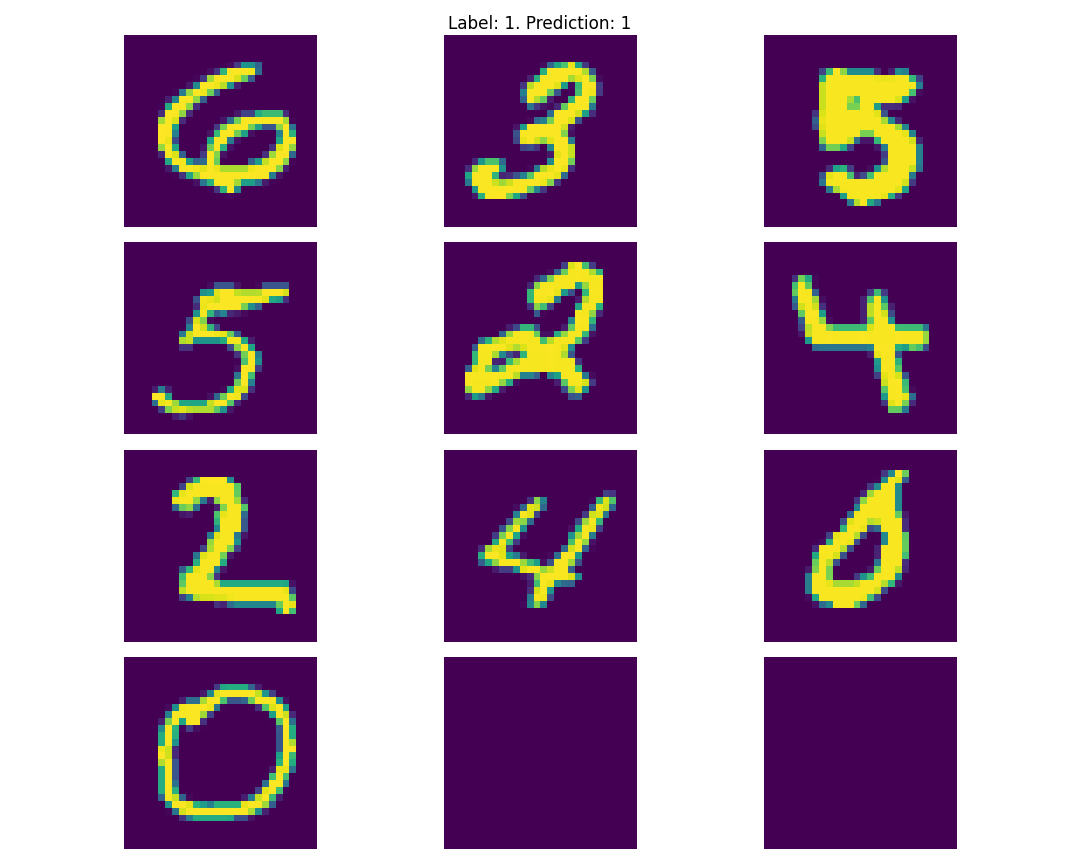

In [54]:
visualize_dataset(dataset)